In [87]:
# 載入需要的套件
import os
import numpy as np 
import pandas as pd
import copy
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
# 設定 data_path
dir_data = './data/'
Train = os.path.join(dir_data, 'train.csv')
Test = os.path.join(dir_data, 'test.csv')

# 讀取檔案
Train_data = pd.read_csv(Train)
Test_data = pd.read_csv(Test)

In [125]:
train_Y = np.log1p(Train_data['total_price'])
ids = Test_data['building_id']

tp = copy.deepcopy(np.log1p(Train_data['total_price']))

Train_data = Train_data.drop(['building_id', 'total_price'] , axis=1)
Test_data = Test_data.drop(['building_id'] , axis=1)

df = pd.concat([Train_data,Test_data])

df = df.fillna(df.mean())
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

df.head()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,8,21,18674,4,3,2,6271,2,7.133303,50299.900174,...,21,58,1,157,1,2483,1,6011,1,34.469803
1,8,7,18800,5,1,2,7885,2,7.133303,50299.900174,...,7,28,1,115,1,15872,1,32221,1,40.073573
2,8,7,19289,4,1,2,6028,2,7.133303,50299.900174,...,27,78,1,212,1,15760,1,32228,1,54.462081
3,8,21,20385,24,0,2,18325,0,7.133303,81138.889762,...,2,20,1,125,1,2568,1,7271,1,99.628966
4,1,21,20657,2,4,2,6880,2,7.133303,50299.900174,...,2,18,1,47,1,2587,1,7442,1,124.131236


In [98]:
estimator = RandomForestRegressor()
estimator.fit(train_X, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)

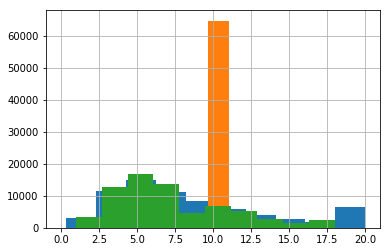

In [126]:
from scipy import stats

df['building_area'] = df['building_area'].clip(0.3, 20)
df['building_area'].hist()

df['parking_price'].replace({np.nan: df['parking_price'].mean()}, inplace = True)
df['parking_price'] = np.log1p(df['parking_price'])
df['parking_price'].hist()

df['land_area'] = df['land_area'].clip(2.22, 100)
df['land_area'] = stats.boxcox(df['land_area'], lmbda=0.5)
df['land_area'].hist()

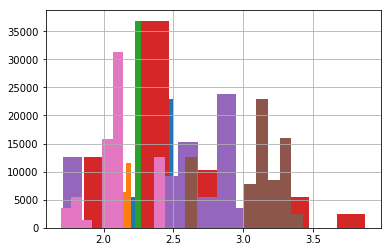

In [127]:
df['divorce_rate'].hist()
df['marriage_rate'] = stats.boxcox(df['marriage_rate'], lmbda=0.25)
df['marriage_rate'].hist()

df['death_rate'] = stats.boxcox(df['death_rate'], lmbda=0.25)
df['death_rate'].hist()

df['elementary_rate'] = df['elementary_rate']*20
df['elementary_rate'].hist()

df['junior_rate'] = df['junior_rate']*15
df['junior_rate'].hist()

df['highschool_rate'] = df['highschool_rate']*10
df['highschool_rate'].hist()

df['jobschool_rate'] = df['jobschool_rate']*20
df['jobschool_rate'].hist()

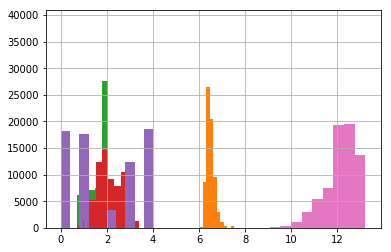

In [120]:
#df['lat'] = df['lat']/df['lat'].max()
#df['lat'].hist()

#df['village_income_median'] = np.log1p(df['village_income_median'])
#df['village_income_median'].hist()

#df['txn_floor'] = np.log1p(df['txn_floor'])
#df['txn_floor'].hist()

#df['total_floor'] = np.log1p(df['total_floor'])
#df['total_floor'].hist()

#df['building_type'].hist()

#df['lon'] = df['lon']/df['lon'].max()
#df['lon'].hist()

#df['town_population'] = np.log1p(df['town_population'])
#df['town_population'].hist()

In [128]:
df['XIII_10000'] = pd.qcut(df["XIII_10000"], 20, labels=[x for x in range(1, 21)])
df['building_complete_dt'] = pd.qcut(df["building_complete_dt"], 20, labels=[x for x in range(1, 21)])
df['txn_dt'] = pd.qcut(df["txn_dt"], 20, labels=[x for x in range(1, 21)])
df['XIII_5000'] = pd.qcut(df["XIII_5000"], 20, labels=[x for x in range(1, 21)])
df['V_10000'] = pd.qcut(df["V_10000"], 20, labels=[x for x in range(1, 21)])
df['VII_1000'] = pd.qcut(df["VII_1000"], 20, labels=[x for x in range(1, 21)])
df['V_5000'] = pd.qcut(df["V_5000"], 20, labels=[x for x in range(1, 21)])
df['XIV_5000'] = pd.qcut(df["XIV_5000"], 20, labels=[x for x in range(1, 21)])
df['II_5000'] = pd.qcut(df["II_5000"], 20, labels=[x for x in range(1, 21)])
df['II_1000'] = pd.qcut(df["II_1000"], 20, labels=[x for x in range(1, 21)])
df['XII_1000'] = pd.qcut(df["XII_1000"], 20, labels=[x for x in range(1, 21)])
df['X_5000'] = pd.qcut(df["X_5000"], 20, labels=[x for x in range(1, 21)])
df['VII_5000'] = pd.qcut(df["VII_5000"], 20, labels=[x for x in range(1, 21)])
df['VII_500'] = pd.qcut(df["VII_500"], 20, labels=[x for x in range(1, 21)])
df['XII_500'] = pd.qcut(df["XII_500"], 20, labels=[x for x in range(1, 21)])
df['XI_1000'] = pd.qcut(df["XI_1000"], 20, labels=[x for x in range(1, 21)])
df['IX_1000'] = pd.qcut(df["IX_1000"], 20, labels=[x for x in range(1, 21)])
df['VI_5000'] = pd.qcut(df["VI_5000"], 20, labels=[x for x in range(1, 21)])
df['XIV_10000'] = pd.qcut(df["XIV_10000"], 20, labels=[x for x in range(1, 21)])
df['IX_5000'] = pd.qcut(df["IX_5000"], 20, labels=[x for x in range(1, 21)])

In [129]:
train_X = df[:train_num]
test_X = df[train_num:]

high_feature = list(feats[:37].index)
estimator_ = RandomForestRegressor(max_depth=20)
estimator_.fit(train_X[high_feature], train_Y)

predict = estimator_.predict(test_X[high_feature])

test_price = np.expm1(predict)

submit = pd.DataFrame(ids)
submit['total_price'] = test_price.astype(np.int32)
submit.to_csv("2019-06-02.csv",index=False)